In [92]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay

In [17]:
wine = pd.read_csv('data/winequality-red.csv', delimiter=';')
wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
X = wine.drop('quality', axis=1)
y = wine['quality']
# percent of positive class
y.mean()

0.1357098186366479

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
dtc = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dtc, param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='f1')

In [22]:
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'min_samples_split': 26, 'min_samples_leaf': 17, 'max_leaf_nodes': 9, 'max_depth': 77, 'ccp_alpha': 0.0}
0.4766700936445692


In [39]:
clf = GridSearchCV(dtc, param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [2, 4, 15, 26, 30, 40], 'max_leaf_nodes': [6, 8, 9, 50, 75], 'ccp_alpha': [0, 0.001, .0001, 0.1, 0.2]}, cv=5, n_jobs=-1, scoring='f1', verbose=1)

In [40]:
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
{'ccp_alpha': 0, 'max_depth': 20, 'max_leaf_nodes': 50, 'min_samples_split': 4}
0.5120730200167272


In [45]:
clf = GridSearchCV(dtc, param_grid={'max_depth': range(10,30,1), 'min_samples_split': [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15, 26, 30, 40], 'max_leaf_nodes': [6, 8, 9, 50, 75], 'ccp_alpha': [0.0, 0.1, 0.2]}, cv=5, n_jobs=-1, scoring='f1', verbose=1)

In [46]:
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 5100 candidates, totalling 25500 fits
{'ccp_alpha': 0.0, 'max_depth': 13, 'max_leaf_nodes': 75, 'min_samples_split': 3}
0.5189351268039794


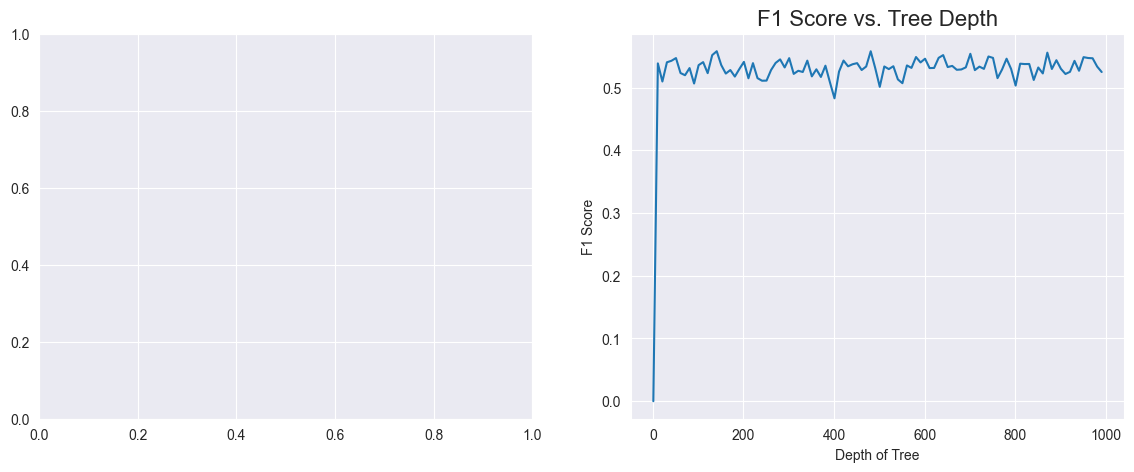

In [91]:
dtc = DecisionTreeClassifier(random_state=42, min_samples_split=3)
n=20
# ccp_alphas = [x / 10000 for x in range(0, 500, 1)]
# scores=[]
# for ccp_alpha in ccp_alphas:
#     avg = 0
#     for i in range(n):
#         X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
#         clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
#         clf.fit(X_tr, y_tr)
#         avg += f1_score(y_val, clf.predict(X_val))
#     avg /= n
#     scores.append(avg)
#
f, ax = plt.subplots(1,2, figsize=(14, 5))
# sns.lineplot(x=np.array(ccp_alphas), y=np.array(scores), ax=ax[0])
# ax[0].set_title("F1 Score vs. CCP Alpha", fontsize=16)
# ax[0].set(xlabel='CCP Alpha', ylabel='F1 Score')


opts = range(1, 1000, 10)
scores = []
for opt in opts:
    avg = 0
    for i in range(n):
        X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
        clf = DecisionTreeClassifier(random_state=0, max_depth=opt)
        clf.fit(X_tr, y_tr)
        avg += f1_score(y_val, clf.predict(X_val))
    avg /= n
    scores.append(avg)


sns.lineplot(x=np.array(opts), y=np.array(scores), markers=True, ax=ax[1])
ax[1].set_title("F1 Score vs. Tree Depth", fontsize=16)
ax[1].set(xlabel='Depth of Tree', ylabel='F1 Score')
plt.savefig('F1 Score vs. Tree Depth.png')

In [85]:
plt.savefig('F1 Score vs. CCP Alpha.png')

<Figure size 640x480 with 0 Axes>

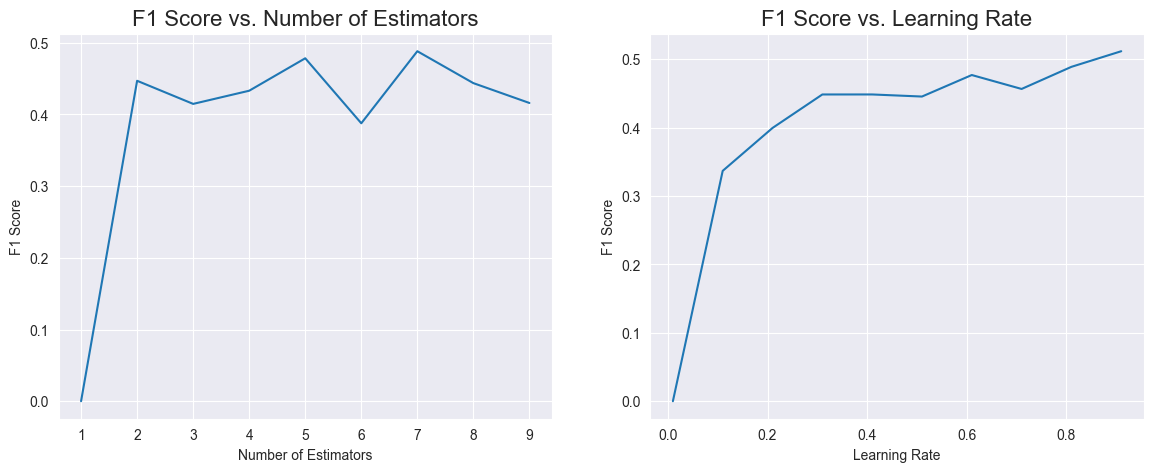

In [87]:
abc = AdaBoostClassifier(random_state=42)
n=10
n_estimators = range(1, 10)
scores=[]
for n_estimator in n_estimators:
    avg = 0
    for i in range(n):
        X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
        clf = AdaBoostClassifier(random_state=42, n_estimators=n_estimator)
        clf.fit(X_tr, y_tr)
        avg += f1_score(y_val, clf.predict(X_val))
    avg /= n
    scores.append(avg)

f, ax = plt.subplots(1,2, figsize=(14, 5))
sns.lineplot(x=np.array(n_estimators), y=np.array(scores), ax=ax[0])
ax[0].set_title("F1 Score vs. Number of Estimators", fontsize=16)
ax[0].set(xlabel='Number of Estimators', ylabel='F1 Score')


l_rates = [x/100 for x in range(1, 100, 10)]
scores = []
for l_rate in l_rates:
    avg = 0
    for i in range(n):
        X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
        clf = AdaBoostClassifier(random_state=0, learning_rate=l_rate)
        clf.fit(X_tr, y_tr)
        avg += f1_score(y_val, clf.predict(X_val))
    avg /= n
    scores.append(avg)


sns.lineplot(x=np.array(l_rates), y=np.array(scores), markers=True, ax=ax[1])
ax[1].set_title("F1 Score vs. Learning Rate", fontsize=16)
ax[1].set(xlabel='Learning Rate', ylabel='F1 Score')
plt.savefig('F1 Score vs. Learning Rate.png')


In [ ]:
plt.savefig('F1 Score vs. Number of Estimators.png')

In [93]:
decision_tree_params = {'ccp_alpha': 0.0, 'max_depth': 13, 'max_leaf_nodes': 75, 'min_samples_split': 3}
decision_tree = DecisionTreeClassifier(random_state=42, **decision_tree_params)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=75, min_samples_split=3,
                       random_state=42)

<Figure size 640x480 with 0 Axes>

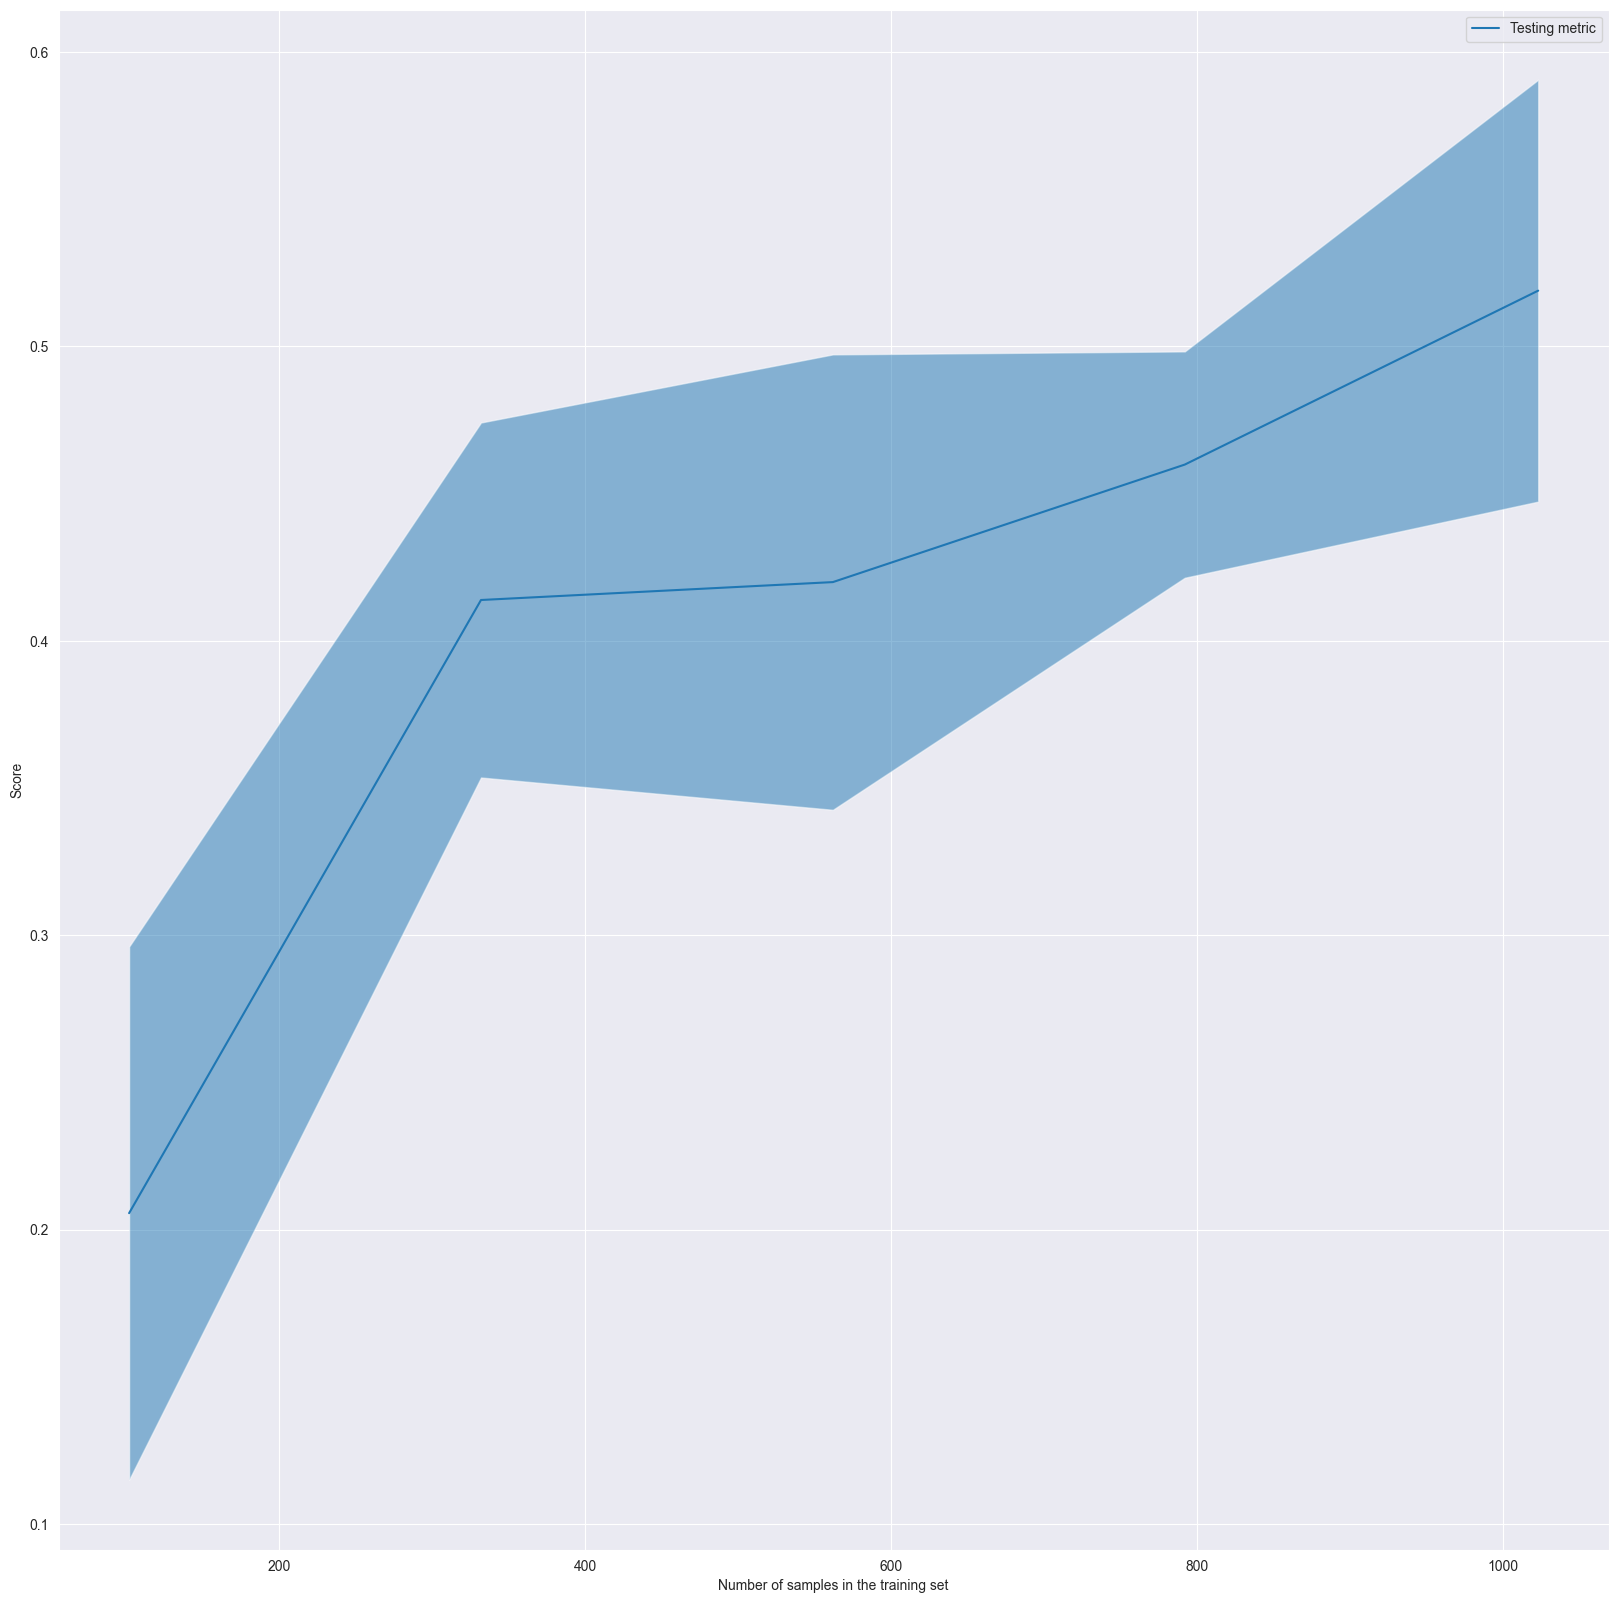

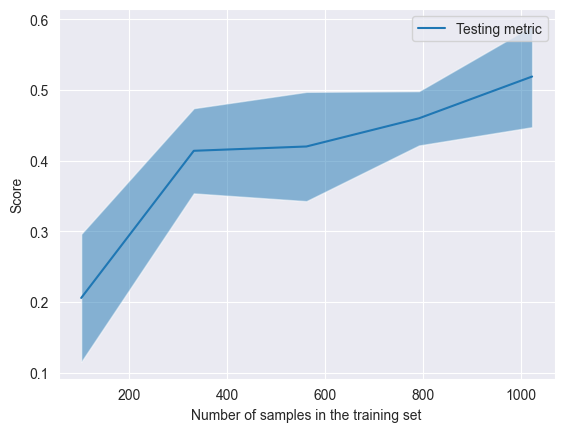

In [103]:
plt.clf()
fig, ax = plt.subplots(figsize=(20, 20))
LearningCurveDisplay.from_estimator(decision_tree, X_train, y_train, cv=5, n_jobs=-1, scoring='f1').plot(ax=ax)
plt.savefig('Learning Curve Decision Tree.png')